## Load Data

In [12]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [13]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Weight Increasing (std=1)

In [14]:
# solution 1: increase weight value

#################### YOUR CODE HERE ####################
initializer = keras.initializers.RandomNormal(mean=0., stddev=1.)

# Đặt initializer ở trên vào các layer có ký hiệu #??
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(10))
########################################################

# optimizer and loss
model.compile(optimizer=keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)

Epoch 1/300
118/118 - 3s - loss: 2.3269 - accuracy: 0.1245 - val_loss: 2.2766 - val_accuracy: 0.1343 - 3s/epoch - 26ms/step
Epoch 2/300
118/118 - 2s - loss: 2.2551 - accuracy: 0.1644 - val_loss: 2.2349 - val_accuracy: 0.1764 - 2s/epoch - 18ms/step
Epoch 3/300
118/118 - 2s - loss: 2.2106 - accuracy: 0.2090 - val_loss: 2.1884 - val_accuracy: 0.2196 - 2s/epoch - 18ms/step
Epoch 4/300
118/118 - 2s - loss: 2.1604 - accuracy: 0.2458 - val_loss: 2.1350 - val_accuracy: 0.2561 - 2s/epoch - 18ms/step
Epoch 5/300
118/118 - 2s - loss: 2.1013 - accuracy: 0.2796 - val_loss: 2.0721 - val_accuracy: 0.2893 - 2s/epoch - 18ms/step
Epoch 6/300
118/118 - 2s - loss: 2.0382 - accuracy: 0.3098 - val_loss: 2.0088 - val_accuracy: 0.3208 - 2s/epoch - 18ms/step
Epoch 7/300
118/118 - 2s - loss: 1.9727 - accuracy: 0.3352 - val_loss: 1.9443 - val_accuracy: 0.3408 - 2s/epoch - 18ms/step
Epoch 8/300
118/118 - 2s - loss: 1.9069 - accuracy: 0.3595 - val_loss: 1.8797 - val_accuracy: 0.3633 - 2s/epoch - 18ms/step
Epoch 9/

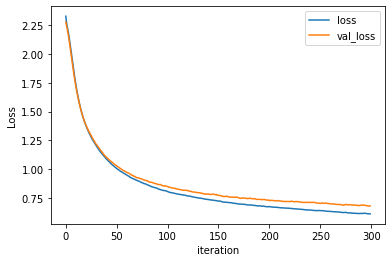

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

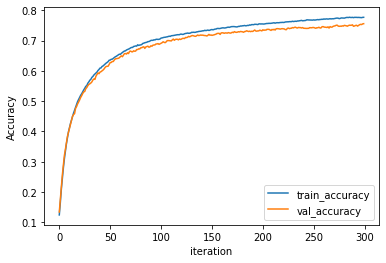

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()